# The Empirical Rule and Distribution

The empirical rule or the 68 - 95 - 99.7 rule, which describes how many observations fall within a certain distance from our mean.  This distance from the mean is denoted as sigma, or standard deviation (the average distance an observation is from the mean).

The following image may help refresh your memory:

![](img/three_sigma_rule.png)

For this tutorial, we will be exploring the number of hours the average college student gets.

The example used in lecture stated there was a mean of 7 and standard deviation of 1.7 for hours of sleep; we will use these same values.

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

sns.set_style('darkgrid')
random.seed(1738)

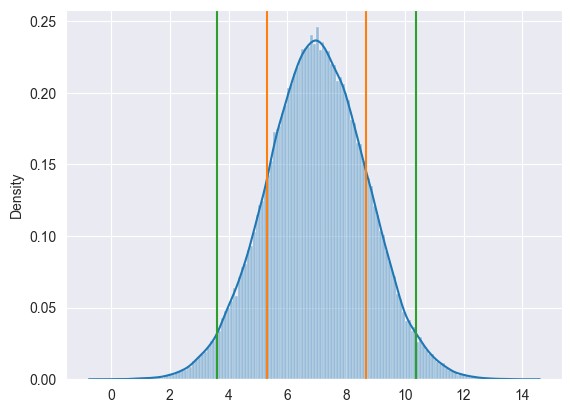

In [2]:
obs = [random.normalvariate(mu=7, sigma=1.7) for _ in range(100000)]
mean = np.mean(obs)
std = np.std(obs)

sns.histplot(data=obs, stat='density', kde=True, alpha=.4)
# 68%
plt.axvline(mean - std, color='tab:orange')
plt.axvline(mean + std, color='tab:orange')
# 95%
plt.axvline(mean - 2 * std, color='tab:green')
plt.axvline(mean + 2 * std, color='tab:green')
plt.show()

In [3]:
pd.Series(obs).describe()

count    100000.000000
mean          7.000626
std           1.693249
min          -0.754203
25%           5.865611
50%           7.003080
75%           8.144851
max          14.595650
dtype: float64

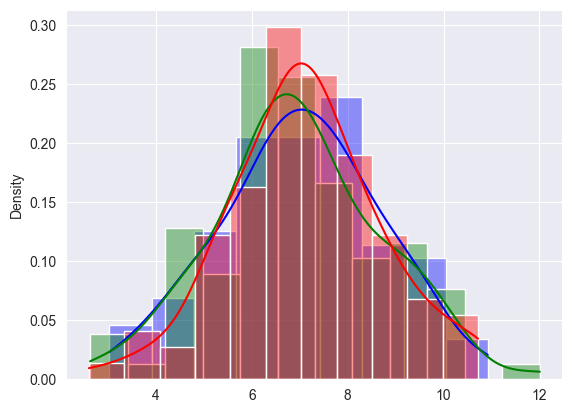

In [4]:
sampleA = random.sample(obs, 100)
sampleB = random.sample(obs, 100)
sampleC = random.sample(obs, 100)

fig, ax = plt.subplots()
sns.histplot(sampleA, ax=ax, stat='density', kde=True, color='blue', alpha=.4)
sns.histplot(sampleB, ax=ax, stat='density', kde=True, color='green', alpha=.4)
sns.histplot(sampleC, ax=ax, stat='density', kde=True, color='red', alpha=.4)

plt.show()

Now that we have covered the 68 - 95 - 99.7 rule, we will take this a step further and discuss the empirical distribution.

The empirical distribution is a cumulative density function that signifies the proportion of observations that are less than or equal to a certain values.

Now, by using our observations for ours of sleep, we can create an empirical distribution in python that signifies the proportion of observations are observed at a specific number for hours of sleep.

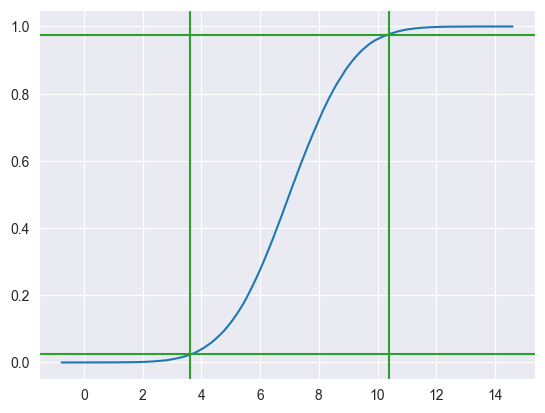

In [5]:
ecdf = ECDF(obs)

plt.plot(ecdf.x, ecdf.y)
# 95%
plt.axvline(x=mean - 2 * std, color='tab:green')
plt.axvline(x=mean + 2 * std, color='tab:green')
plt.axhline(y=0.025, color='tab:green')
plt.axhline(y=0.975, color='tab:green')
plt.show()